## Super resolution test

In [1]:
import fastai
from fastai.vision import *
from fastai.callbacks import *
from fastai.utils.mem import *

from torchvision.models import vgg16_bn
from misc import prediction_to_image

In [2]:
arch = models.resnet34

In [3]:
size=(300,300)

In [4]:
path = Path('./test_data')

In [5]:
data = (ImageImageList.from_folder(path/'cellsLR').split_by_rand_pct(.5, seed=42)
          .label_from_func(lambda x: path/'cellsHR'/x.name)
          .transform(get_transforms(), size=size, tfm_y=True)
          .databunch(bs=1).normalize(imagenet_stats, do_y=True))
data.c = 3

In [6]:
learn = unet_learner(data, arch, loss_func=F.l1_loss, blur=True, norm_type=NormType.Weight)

In [7]:
learn.load('./2b');

In [8]:
learn.data = data

In [9]:
fn_lr = data.valid_ds.x.items[2]; fn_lr
fn_hr = data.valid_ds.y.items[2]; fn_hr

PosixPath('test_data/cellsHR/I07_s1_w5.png')

In [10]:
img_lr = open_image(fn_lr)
img_lr.shape

torch.Size([3, 103, 103])

In [11]:
img_hr = open_image(fn_hr)
img_hr.shape

torch.Size([3, 512, 512])

In [12]:
p,img_pr,b = learn.predict(img_lr)

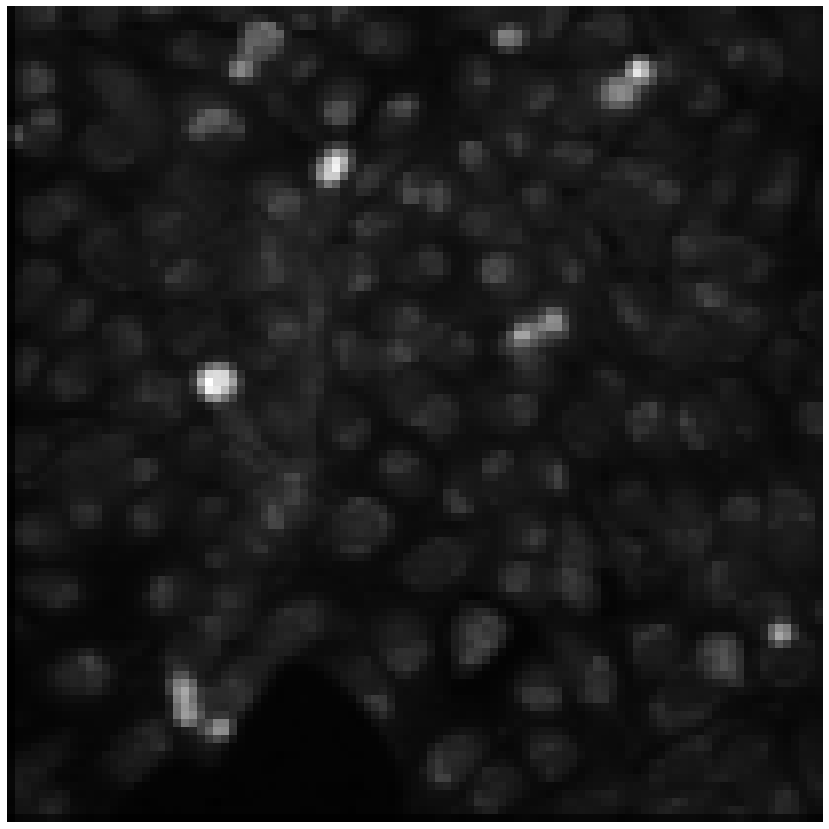

In [13]:
show_image(img_lr, figsize=(15,15), interpolation='nearest');

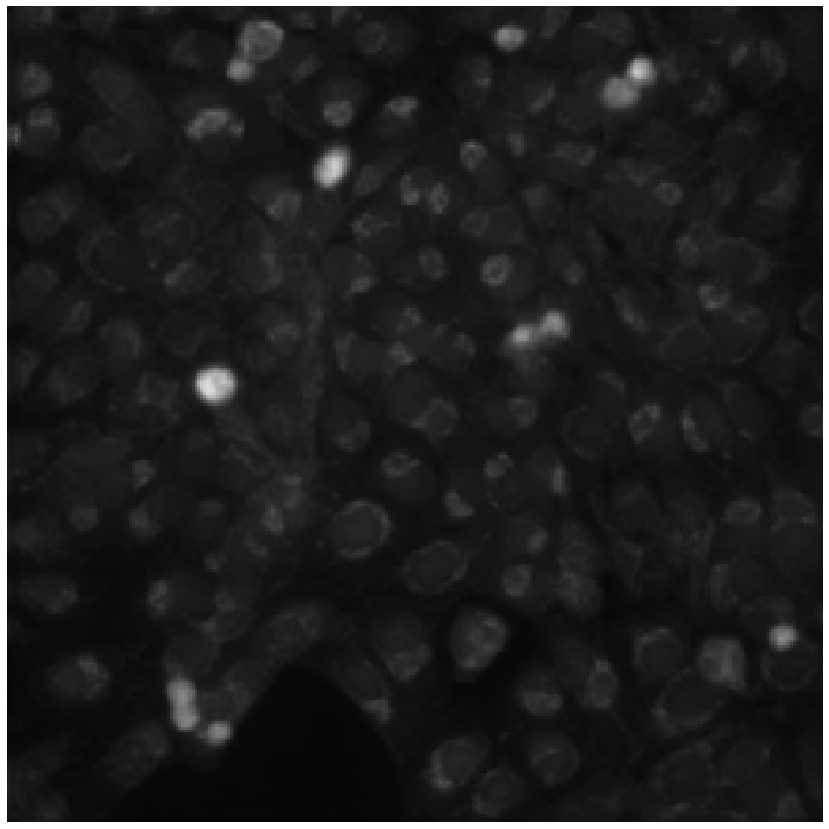

In [14]:
Image(img_pr).show(figsize=(15,15))

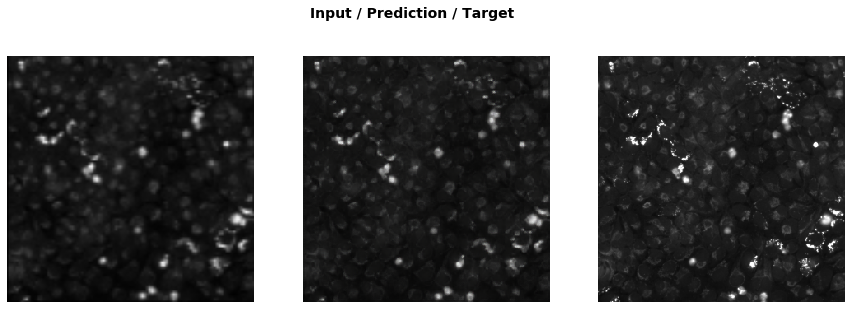

In [15]:
learn.show_results(imgsize=5, cmap='gray')

In [16]:
savepath = Path('./results/cells')

In [17]:
img_lr.save(savepath/re.sub('\.','_LR.', fn_lr.name))
img_hr.save(savepath/re.sub('\.','_HR.', fn_lr.name))
prediction_to_image(img_pr).save(savepath/re.sub('\.','_PR.', fn_lr.name))